# huggingface + WRIMEデータセット で感情推定

## 環境構築

In [ ]:
# huggingface transformer のインストール
# - transformers : 主たるモジュール（モデルやトークナイザのダウンロード)
# - datasets : HuggingFaceで、データセットを扱うためのモジュール
# https://huggingface.co/docs/transformers/installation
!pip install datasets transformers==4.28.0
# 東北大学の日本語用BERT使用に必要なパッケージをインストール
! pip install fugashi ipadic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 52.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 600.9/600.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 23.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ipadic: filename=ipa

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Hugging Face (Transformers) 関連のモジュール
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import TrainingArguments, Trainer
from datasets import Dataset, load_metric

### Matplotlibで日本語を使用できるようにする

In [ ]:
pip install japanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=c01813a723b05e476fe589509fbea9107c6cf3be91fffbe588dc0eb002537065
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [ ]:
# [前準備] Matplotlib で日本語フォントを使用できるようにする
# cf. https://blog.3qe.us/entry/2018/08/16/121457
# cf. https://colab.research.google.com/github/aquapathos/Semi3B/blob/master/HowToUseJapaneseOnColab.ipynb#scrollTo=D5QD37p6df9b
!apt-get -y install fonts-ipafont-gothic

#!rm /root/.cache/matplotlib/fontlist-v300.json

!ls /root/.cache/matplotlib
!rm -r /root/.cache/matplotlib

#!rm /root/.cache/matplotlib/fontlist-v310.json

# NOTE ここで、ランタイムを再起動

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 24 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 1s (9,069 kB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 121654 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipa

Text(0.5, 1.0, '日本語を表示できるかテスト')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 35486 (\N{CJK UNIFIED IDEOGRAPH-8A9E}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12434 (\N{HIRAGANA LETTER WO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 34920 (\N{CJK UNIFIED IDEOGRAPH-8868}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) mis

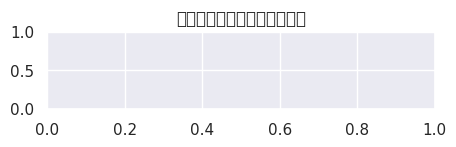

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font='IPAGothic')

# 動作確認
plt.figure(figsize=(5,1))
plt.title('日本語を表示できるかテスト')

## データセットの準備

### WRIMEデータセットのダウンロード

In [ ]:
# GitHubよりWRIMEデータをダウンロードする
#
# WRIME dataset : https://github.com/ids-cv/wrime
# 今回使用するのは ver1 （感情極性が付与されていない版）
! wget https://github.com/ids-cv/wrime/raw/master/wrime-ver1.tsv

--2024-01-12 02:20:16--  https://github.com/ids-cv/wrime/raw/master/wrime-ver1.tsv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ids-cv/wrime/master/wrime-ver1.tsv [following]
--2024-01-12 02:20:17--  https://raw.githubusercontent.com/ids-cv/wrime/master/wrime-ver1.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9487235 (9.0M) [text/plain]
Saving to: ‘wrime-ver1.tsv’

wrime-ver1.tsv      100%[===================>]   9.05M  --.-KB/s    in 0.1s    

2024-01-12 02:20:18 (90.2 MB/s) - ‘wrime-ver1.tsv’ saved [9487235/9487235]



In [ ]:
# pandas.DataFrameとして読み込む
df_wrime = pd.read_table('wrime-ver1.tsv')
df_wrime.head(2)

,Sentence,UserID,Datetime,Train/Dev/Test,Writer_Joy,Writer_Sadness,Writer_Anticipation,Writer_Surprise,Writer_Anger,Writer_Fear,...,Reader3_Disgust,Reader3_Trust,Avg. Readers_Joy,Avg. Readers_Sadness,Avg. Readers_Anticipation,Avg. Readers_Surprise,Avg. Readers_Anger,Avg. Readers_Fear,Avg. Readers_Disgust,Avg. Readers_Trust
0,ぼけっとしてたらこんな時間｡チャリあるから食べにでたいのに…,1,2012/07/31 23:48,train,0,1,2,1,1,0,...,1,0,0,2,0,0,0,0,0,0
1,今日の月も白くて明るい。昨日より雲が少なくてキレイな? と立ち止まる帰り道｡チャリなし生活も...,1,2012/08/02 23:09,train,3,0,3,0,0,0,...,0,1,1,0,0,2,0,0,0,0


### 前処理

__前提①：WRIMEデータセットのラベルは、各感情の強度__
- 各感情（例えば、Joy=喜）の強度を、0〜3の４段階でラベル付けしている
- ８つの感情全てにおいて、最頻ラベルは「0」


__前提②：WRIMEデータセットには、複数種類のラベルが付与されている__
1. Writer_*
    - 文章の __書き手__ が自身で付与したラベル。「主観感情」。
2. Reader{1,2,3}_* :
    - 文章の __読み手__ が付与したラベル。「客観感情」。３名分。
3. Avg.Readers_*
    - ３名分の客観感情の平均値。

問題設定
1. ８つの感情の、分類タスクとして扱う
    - 相対的にどの感情が強いかを推定する
    - データセットの本来の用途としては感情強度を推定するタスク。しかしながら、感情強度=0のサンプルが多く、やや扱いが難しいため、今回は簡素化して扱う。
2. 客観感情の平均値を使用する
    - 論文において、主観感情と客観感情は異なることが指摘されている
    - 主観感情は、書き手の性格や表現方法に依存する部分がある。そのため、客観感情、かつ、その平均値を用いることで、推定結果の納得感が高くなることが期待される

In [ ]:
# Plutchikの8つの基本感情
emotion_names = ['Joy', 'Sadness', 'Anticipation', 'Surprise', 'Anger', 'Fear', 'Disgust', 'Trust']
emotion_names_jp = ['喜び', '悲しみ', '期待', '驚き', '怒り', '恐れ', '嫌悪', '信頼']  # 日本語版
num_labels = len(emotion_names)

# readers_emotion_intensities 列を生成する
# "Avg. Readers_*" の値をlist化したもの
df_wrime['readers_emotion_intensities'] = df_wrime.apply(lambda x: [x['Avg. Readers_' + name] for name in emotion_names], axis=1)

# 感情強度が低いサンプルは除外する
# (readers_emotion_intensities の max が２以上のサンプルのみを対象とする)
is_target = df_wrime['readers_emotion_intensities'].map(lambda x: max(x) >= 2)
df_wrime_target = df_wrime[is_target]

In [ ]:
# train / test に分割する
df_groups = df_wrime_target.groupby('Train/Dev/Test')
df_train = df_groups.get_group('train')
df_test = pd.concat([df_groups.get_group('dev'), df_groups.get_group('test')])
print('train :', len(df_train))
print('test :', len(df_test))

train : 17104
test : 1133


## モデル(BERT)を訓練する

### Tokenizerで入力データに変換

In [ ]:
# 使用するモデルを指定して、Tokenizerを読み込む
checkpoint = 'cl-tohoku/bert-base-japanese-whole-word-masking'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/110 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/258k [00:00<?, ?B/s]

In [ ]:
# 前処理関数: tokenize_function
# 感情強度の正規化（総和=1）も同時に実施する
def tokenize_function(batch):
    tokenized_batch = tokenizer(batch['Sentence'], truncation=True, padding='max_length')
    tokenized_batch['labels'] = [x / np.sum(x) for x in batch['readers_emotion_intensities']]  # 総和=1に正規化
    return tokenized_batch

# Transformers用のデータセット形式に変換
# pandas.DataFrame -> datasets.Dataset
target_columns = ['Sentence', 'readers_emotion_intensities']
train_dataset = Dataset.from_pandas(df_train[target_columns])
test_dataset = Dataset.from_pandas(df_test[target_columns])

# 前処理（tokenize_function） を適用
train_tokenized_dataset = train_dataset.map(tokenize_function, batched=True)
test_tokenized_dataset = test_dataset.map(tokenize_function, batched=True)

Parameter 'function'=<function tokenize_function at 0x7a7789c54040> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


Map:   0%|          | 0/17104 [00:00<?, ? examples/s]

Map:   0%|          | 0/1133 [00:00<?, ? examples/s]

### 訓練済みモデルの読み込み

In [ ]:
# 分類モデルのため AutoModelForSequenceClassification を使用する
# checkpoint と num_labels（クラス数） を指定する. 今回は、いずれも上で定義済み
# - checkpoint = 'cl-tohoku/bert-base-japanese-whole-word-masking'
# - num_labels = 8
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=num_labels)

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of the model checkpoint at cl-tohoku/bert-base-japanese-whole-word-masking were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialize

### 訓練を実行

In [ ]:
# 評価指標を定義
# https://huggingface.co/docs/transformers/training
metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    label_ids = np.argmax(labels, axis=-1)
    return metric.compute(predictions=predictions, references=label_ids)

<ipython-input-14-175910f6c859>:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")
/usr/local/lib/python3.10/dist-packages/datasets/load.py:752: FutureWarning: The repository for accuracy contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/accuracy/accuracy.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


In [ ]:
# Transformers の Trainer を用いる
# https://huggingface.co/docs/transformers/v4.21.1/en/main_classes/trainer#transformers.TrainingArguments

# 訓練時の設定
training_args = TrainingArguments(
    output_dir="test_trainer",
    per_device_train_batch_size=8,
    num_train_epochs=1.0,
    evaluation_strategy="steps", eval_steps=200)  # 200ステップ毎にテストデータで評価する

# Trainerを生成
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized_dataset,
    eval_dataset=test_tokenized_dataset,
    compute_metrics=compute_metrics,
)

# 訓練を実行
trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Accuracy
200,No log,0.258340,0.625772
400,No log,0.251638,0.648720
600,0.297000,0.232852,0.687555
800,0.297000,0.220886,0.718447
1000,0.262300,0.219632,0.694616
1200,0.262300,0.215706,0.732568
1400,0.262300,0.210387,0.749338
1600,0.248700,0.208984,0.753751
1800,0.248700,0.206240,0.758164
2000,0.238100,0.203161,0.762577


TrainOutput(global_step=2138, training_loss=0.26006728761992354, metrics={'train_runtime': 1995.3112, 'train_samples_per_second': 8.572, 'train_steps_per_second': 1.072, 'total_flos': 4500493926531072.0, 'train_loss': 0.26006728761992354, 'epoch': 1.0})

## 訓練したモデルで推論する

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21916 (\N{CJK UNIFIED IDEOGRAPH-559C}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12403 (\N{HIRAGANA LETTER BI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24754 (\N{CJK UNIFIED IDEOGRAPH-60B2}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12415 (\N{HIRAGANA LETTER MI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from curren

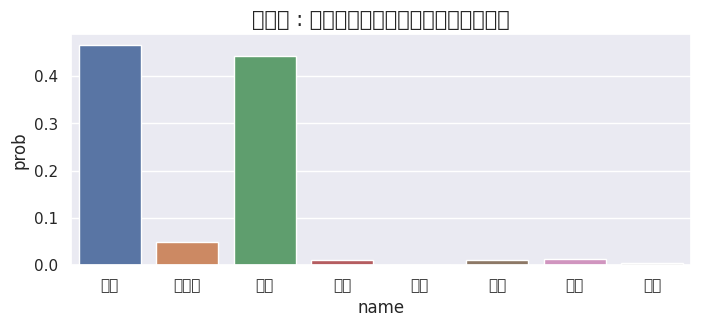

In [ ]:
# https://www.delftstack.com/ja/howto/numpy/numpy-softmax/
def np_softmax(x):
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

def analyze_emotion(text, show_fig=False, ret_prob=False):
    # 推論モードを有効か
    model.eval()

    # 入力データ変換 + 推論
    tokens = tokenizer(text, truncation=True, return_tensors="pt")
    tokens.to(model.device)
    preds = model(**tokens)
    prob = np_softmax(preds.logits.cpu().detach().numpy()[0])
    out_dict = {n: p for n, p in zip(emotion_names_jp, prob)}

    # 棒グラフを描画
    if show_fig:
        plt.figure(figsize=(8, 3))
        df = pd.DataFrame(out_dict.items(), columns=['name', 'prob'])
        sns.barplot(x='name', y='prob', data=df)
        plt.title('入力文 : ' + text, fontsize=15)

    if ret_prob:
        return out_dict

# 動作確認
analyze_emotion('今日から長期休暇だぁーーー！！！', show_fig=True)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21916 (\N{CJK UNIFIED IDEOGRAPH-559C}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12403 (\N{HIRAGANA LETTER BI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24754 (\N{CJK UNIFIED IDEOGRAPH-60B2}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12415 (\N{HIRAGANA LETTER MI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from curren

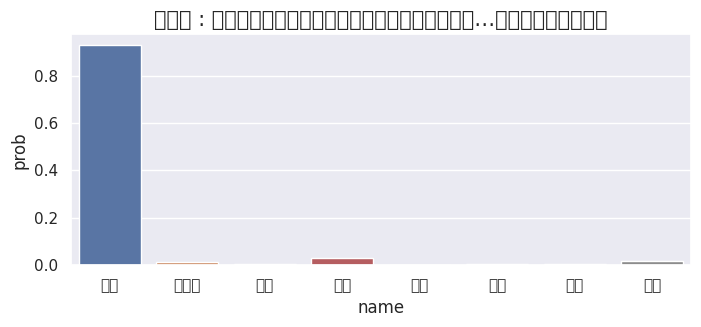

In [ ]:
analyze_emotion('この書類にはコーヒーかかってなくて良かった…。不幸中の幸いだ。', show_fig=True)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21916 (\N{CJK UNIFIED IDEOGRAPH-559C}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12403 (\N{HIRAGANA LETTER BI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24754 (\N{CJK UNIFIED IDEOGRAPH-60B2}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12415 (\N{HIRAGANA LETTER MI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from curren

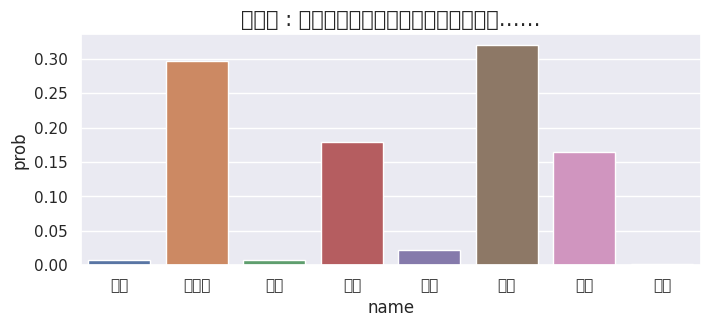

In [ ]:
analyze_emotion('なんで自分だけこんな目に遭うんだ……', show_fig=True)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21916 (\N{CJK UNIFIED IDEOGRAPH-559C}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12403 (\N{HIRAGANA LETTER BI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24754 (\N{CJK UNIFIED IDEOGRAPH-60B2}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12415 (\N{HIRAGANA LETTER MI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from curren

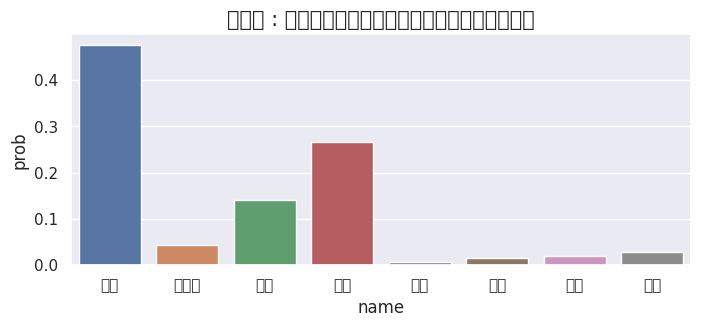

In [ ]:
analyze_emotion('君ならきっとやってくれると思っていたよ！', show_fig=True)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21916 (\N{CJK UNIFIED IDEOGRAPH-559C}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12403 (\N{HIRAGANA LETTER BI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24754 (\N{CJK UNIFIED IDEOGRAPH-60B2}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12415 (\N{HIRAGANA LETTER MI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from curren

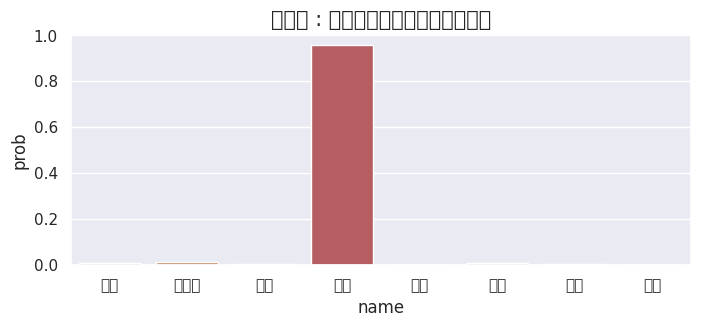

In [ ]:
analyze_emotion('え、今日って休校だったの？', show_fig=True)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21916 (\N{CJK UNIFIED IDEOGRAPH-559C}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12403 (\N{HIRAGANA LETTER BI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24754 (\N{CJK UNIFIED IDEOGRAPH-60B2}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12415 (\N{HIRAGANA LETTER MI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from curren

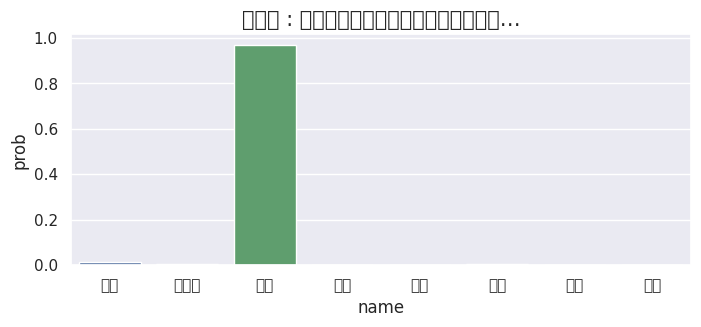

In [ ]:
analyze_emotion('明日のプレゼンうまくできるかなぁ…', show_fig=True)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21916 (\N{CJK UNIFIED IDEOGRAPH-559C}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12403 (\N{HIRAGANA LETTER BI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24754 (\N{CJK UNIFIED IDEOGRAPH-60B2}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12415 (\N{HIRAGANA LETTER MI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from curren

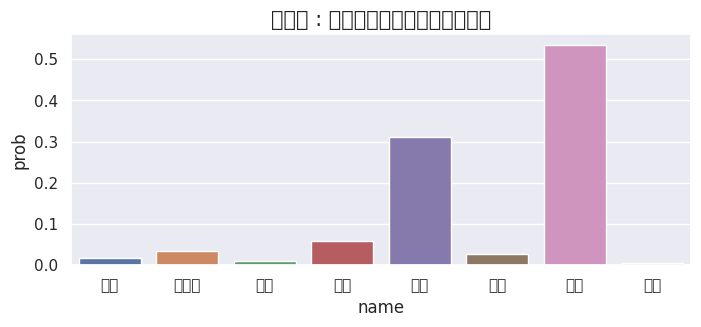

In [ ]:
analyze_emotion('あぁー、イライラするっ！！', show_fig=True)

## 訓練したモデルを用いてmanga109のデータセットの台詞から感情推定を行う

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 21916 (\N{CJK UNIFIED IDEOGRAPH-559C}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12403 (\N{HIRAGANA LETTER BI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24754 (\N{CJK UNIFIED IDEOGRAPH-60B2}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12375 (\N{HIRAGANA LETTER SI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12415 (\N{HIRAGANA LETTER MI}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 26399 (\N{CJK UNIFIED IDEOGRAPH-671F}) missing from curren

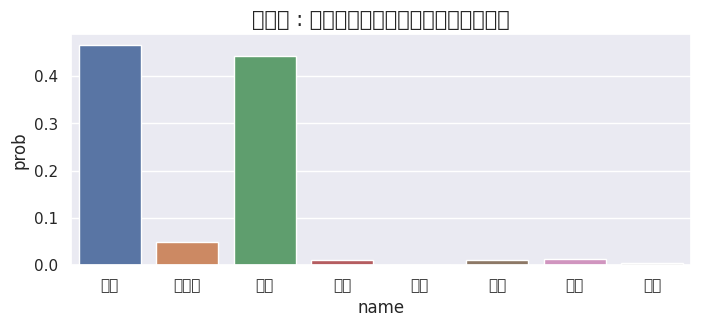

In [ ]:
# https://www.delftstack.com/ja/howto/numpy/numpy-softmax/
def np_softmax(x):
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

def analyze_emotion(text, show_fig=False, ret_prob=False):
    # 推論モードを有効か
    model.eval()

    # 入力データ変換 + 推論
    tokens = tokenizer(text, truncation=True, return_tensors="pt")
    tokens.to(model.device)
    preds = model(**tokens)
    prob = np_softmax(preds.logits.cpu().detach().numpy()[0])
    out_dict = {n: p for n, p in zip(emotion_names_jp, prob)}

    # 棒グラフを描画
    if show_fig:
        plt.figure(figsize=(8, 3))
        df = pd.DataFrame(out_dict.items(), columns=['name', 'prob'])
        sns.barplot(x='name', y='prob', data=df)
        plt.title('入力文 : ' + text, fontsize=15)

    if ret_prob:
        return out_dict

# 動作確認
analyze_emotion('今日から長期休暇だぁーーー！！！', show_fig=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
out_dict = analyze_emotion('我を呼んだのは貴様か……', show_fig=True, ret_prob=True)
print(out_dict)

In [ ]:
# 1つのxlmファイルから感情を推定
import xml.etree.ElementTree as ET
import json

# XMLファイルのパス
xml_path = "/content/drive/MyDrive/Manga109_released_2021_12_30/annotations.v2020.12.18/GOOD_KISS_Ver2.xml"

# 結果を保存する辞書
results = {}

# XMLファイルを読み込む
tree = ET.parse(xml_path)
root = tree.getroot()

# 各ページごとにテキストを抽出し、感情分析を実行
for page_elem in root.findall(".//page"):
    for text_elem in page_elem.findall(".//text"):
        text_id = text_elem.get("id")
        text = text_elem.text


        # 感情分析の際にノイズとなるコードを取り除く
        if text is not None:
            # 改行コードを取り除く
            text = text.replace('\n', '')
            # 全角コードを取り除く
            text = text.replace('\u3000', '')
        #print(text)


        out_dict = analyze_emotion(text, show_fig=False,ret_prob=True)
        #print(out_dict)
        # float32型をfloat型に変換
        emotion_results = {key: float(value) for key, value in out_dict.items()}
        # textも結果に追加
        emotion_results['text'] = text
        results[text_id] = emotion_results

# 結果をJSONファイルに保存
with open("GOOD_KISS_Ver2_emotion_results.json", "w") as json_file:
    json.dump(results, json_file)


In [ ]:
# フォルダ内全てのxlmファイルから感情を推定
import xml.etree.ElementTree as ET
import json
import os

def process_xml_files(xml_directory, output_directory):
    # XMLファイルの一覧を取得
    xml_files = [os.path.join(xml_directory, file) for file in os.listdir(xml_directory) if file.endswith('.xml')]

    # 全てのXMLファイルに対して処理を実行
    for xml_file in xml_files:
        # 結果を保存する辞書
        results = {}

        # XMLファイルを読み込む
        tree = ET.parse(xml_file)
        root = tree.getroot()

        # 各ページごとにテキストを抽出し、感情分析を実行
        for page_elem in root.findall(".//page"):
            for text_elem in page_elem.findall(".//text"):
                text_id = text_elem.get("id")
                text = text_elem.text

                # 感情分析の際にノイズとなるコードを取り除く
                if text is not None:
                    # 改行コードを取り除く
                    text = text.replace('\n', '')
                    # 全角コードを取り除く
                    text = text.replace('\u3000', '')

                out_dict = analyze_emotion(text, show_fig=False, ret_prob=True)

                # float32型をfloat型に変換
                emotion_results = {key: float(value) for key, value in out_dict.items()}
                # textも結果に追加
                emotion_results['text'] = text
                results[text_id] = emotion_results

        # 結果をJSONファイルに保存
        json_output_path = os.path.join(output_directory, os.path.splitext(os.path.basename(xml_file))[0] + "_emotion_results.json")
        with open(json_output_path, "w") as json_file:
            json.dump(results, json_file)

# XMLファイルが存在するディレクトリ
xml_directory = "/content/drive/MyDrive/Manga109_released_2021_12_30/annotations.v2020.12.18"

# 結果を保存するディレクトリ
output_directory = "/content/drive/MyDrive/Manga109_released_2021_12_30/JSON_Folder"

# 処理実行
process_xml_files(xml_directory, output_directory)


ParseError: ignored

In [ ]:
# JSONファイルの読み込み
import json

# JSONファイルのパス
file_path = '/content/drive/MyDrive/Manga109_released_2021_12_30/JSON_Folder/GOOD_KISS_Ver2_emotion_results.json'

# JSONファイルを読み込む
with open(file_path, 'r') as json_file:
    data = json.load(json_file)


# dataは読み込んだJSONデータを含むPythonの辞書やリストなどのデータ構造になります
data


{'000175f5': {'喜び': 0.10229101777076721,
  '悲しみ': 0.5353403091430664,
  '期待': 0.058454107493162155,
  '驚き': 0.07021437585353851,
  '怒り': 0.007130537647753954,
  '恐れ': 0.11732964217662811,
  '嫌悪': 0.10490446537733078,
  '信頼': 0.004335581324994564,
  'text': 'ちょっとすみません'},
 '000175f6': {'喜び': 0.936731219291687,
  '悲しみ': 0.007397179026156664,
  '期待': 0.028516514226794243,
  '驚き': 0.01154849212616682,
  '怒り': 0.000803895469289273,
  '恐れ': 0.0022768413182348013,
  '嫌悪': 0.002890643198043108,
  '信頼': 0.009835215285420418,
  'text': 'グッドキス'},
 '000175f8': {'喜び': 0.007573391310870647,
  '悲しみ': 0.9567509889602661,
  '期待': 0.0040416172705590725,
  '驚き': 0.006686592008918524,
  '怒り': 0.001362487906590104,
  '恐れ': 0.009826065972447395,
  '嫌悪': 0.012786641716957092,
  '信頼': 0.0009721993701532483,
  'text': '失恋しちゃった・・・'},
 '00017602': {'喜び': 0.472651869058609,
  '悲しみ': 0.011163569055497646,
  '期待': 0.348661869764328,
  '驚き': 0.14060209691524506,
  '怒り': 0.0028967896942049265,
  '恐れ': 0.00838730391114

In [ ]:
# いずれかの感情の値が0.5以上の台詞のみ表示
import json

# ここにJSONファイルのパスを指定する
json_file_path = "/content/drive/MyDrive/Manga109_released_2021_12_30/JSON_Folder/Akuhamu_emotion_results.json"

# JSONファイルの読み込み
with open(json_file_path, 'r') as json_file:
    data = json.load(json_file)

# 表示する感情のリスト
target_emotions = ['喜び', '悲しみ', '期待', '驚き', '怒り', '恐れ', '嫌悪', '信頼']

# 感情ごとに処理
for entry_id, emotions in data.items():
    for emotion, value in emotions.items():
        if emotion in target_emotions and value >= 0.5:
            print(f"ID: {entry_id}, 感情: {emotion}, 値: {value}, テキスト: {emotions['text']}")


ID: 00002cfb, 感情: 喜び, 値: 0.5747249722480774, テキスト: いでよ！ 悪魔っ
ID: 00002cfc, 感情: 驚き, 値: 0.6656811833381653, テキスト: 我を呼んだのは貴様か……
ID: 00002cfd, 感情: 期待, 値: 0.5901572704315186, テキスト: 我 梢つつじの名において命じる！
ID: 00002d11, 感情: 驚き, 値: 0.8963925838470459, テキスト: あれ？
ID: 00002d18, 感情: 悲しみ, 値: 0.5844352841377258, テキスト: 我は悪魔・・
ID: 00002d1e, 感情: 期待, 値: 0.9642466306686401, テキスト: す好きな人と両想いにして欲しいの
ID: 00002d1f, 感情: 期待, 値: 0.92301344871521, テキスト: それが貴様の望みか・・・・
ID: 00002d22, 感情: 悲しみ, 値: 0.668352484703064, テキスト: ・・・・・・・・
ID: 00002d2a, 感情: 期待, 値: 0.5181220769882202, テキスト: 望むままに・・は・・
ID: 00002d36, 感情: 期待, 値: 0.9435401558876038, テキスト: よかろう特別証拠をみせてやろう
ID: 00002d41, 感情: 期待, 値: 0.9621232151985168, テキスト: 望むなら世界を滅ぼす事もできるぞ
ID: 00002d46, 感情: 悲しみ, 値: 0.550490140914917, テキスト: 八ム・・・・
ID: 00002d4e, 感情: 喜び, 値: 0.9749535322189331, テキスト: かわいい
ID: 00002d4f, 感情: 驚き, 値: 0.8855035901069641, テキスト: ホントに悪魔なの？
ID: 00002d5b, 感情: 驚き, 値: 0.5933292508125305, テキスト: む！疑っておるのか？
ID: 00002d5f, 感情: 悲しみ, 値: 0.6799376010894775, テキスト: 禁句
ID: 00002d60, 

In [ ]:
data

{'00000001': {'喜び': 0.03620567172765732,
  '悲しみ': 0.36459335684776306,
  '期待': 0.011897570453584194,
  '驚き': 0.14012953639030457,
  '怒り': 0.04962421581149101,
  '恐れ': 0.0946662575006485,
  '嫌悪': 0.3004196584224701,
  '信頼': 0.0024637249298393726,
  'text': 'あ'},
 '00000005': {'喜び': 0.13925352692604065,
  '悲しみ': 0.4401990473270416,
  '期待': 0.04368758946657181,
  '驚き': 0.11503496021032333,
  '怒り': 0.020541738718748093,
  '恐れ': 0.08850205689668655,
  '嫌悪': 0.14722797274589539,
  '信頼': 0.005553113762289286,
  'text': 'キャーッ'},
 '00000007': {'喜び': 0.04221402853727341,
  '悲しみ': 0.11870917677879333,
  '期待': 0.0593758262693882,
  '驚き': 0.1581287682056427,
  '怒り': 0.07807417958974838,
  '恐れ': 0.3064138889312744,
  '嫌悪': 0.2312592715024948,
  '信頼': 0.005824928171932697,
  'text': 'はやく逃げないとまきぞえくっちゃう'},
 '0000000b': {'喜び': 0.010882836766541004,
  '悲しみ': 0.005979933310300112,
  '期待': 0.00431686919182539,
  '驚き': 0.9606921076774597,
  '怒り': 0.0019718236289918423,
  '恐れ': 0.007829834707081318,
  '嫌悪': 

Manga109のデータの台詞に対して，感情推定を行う．

In [ ]:
import json

# JSONファイルのパス
input_file_path = '/content/drive/MyDrive/Manga109_released_2021_12_30/JSON_Folder/DualJustice_emotion_results.json'
output_file_path = '/content/drive/MyDrive/Manga109_released_2021_12_30/JSON_Folder/DualJustice_emotion_results_with_frame_id.json'

# JSONファイルを読み込む
with open(input_file_path, 'r') as json_file:
    data = json.load(json_file)

# 最初に作業を開始するキーの値を入力
start_key = input("最初に作業を開始するtext_idの値を入力してください: ")

# 新しいframe_idを入力
start_flag = False
for key, value in data.items():
    if start_flag or key == start_key:
        start_flag = True
        frame_id = int(input(f"text_id'{key}' の新しいframe_idを入力してください (text: '{value['text']}'): "))
        value['frame_id'] = frame_id

# 更新されたデータを新しいパスに保存
with open(output_file_path, 'w') as json_output_file:
    json.dump(data, json_output_file, indent=2)

# 保存したファイルのパスを表示
print(f"Updated data saved to: {output_file_path}")


最初に作業を開始するtext_idの値を入力してください: 00012d00


KeyboardInterrupt: ignored

感情推定したい台詞のIDを入力してください．00003a99
{'喜び': 0.577591, '悲しみ': 0.019197324, '期待': 0.036785547, '驚き': 0.3337248, '怒り': 0.0028463905, '恐れ': 0.0076174736, '嫌悪': 0.012740791, '信頼': 0.009496622}


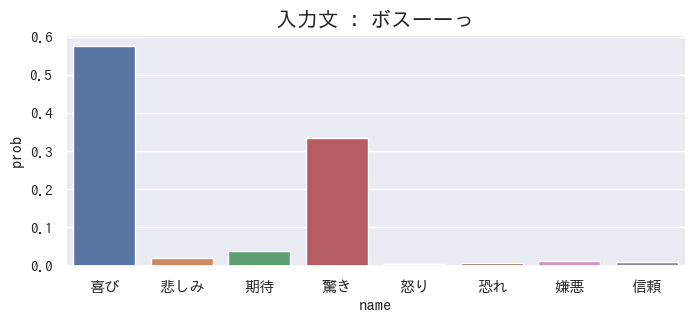

In [ ]:
input_ID = input("感情推定したい台詞のIDを入力してください．")
out_dict = analyze_emotion(data[input_ID]['text'], show_fig=True, ret_prob=True)
print(out_dict)